In [1]:
import re #regular expressions to read emails

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat
import utils

grader=utils.Grader()

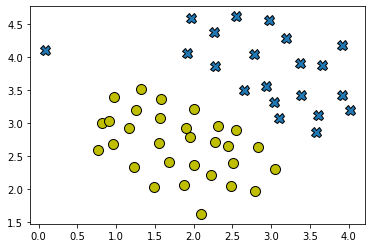

In [2]:
data= loadmat(os.path.join('Data','ex6data1.mat'))
X, y=data['X'], data['y'][:,0]
utils.plotData(X,y)

## 1.1 Linearly Separable SVMs
The following cell will run the SVM training (with $C=1$) using SVM software that we have included with the starter code (function svmTrain within the utils module of this exercise). When $C=1$, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point on the far left, as shown in the figure (left) below. 

In order to minimize the dependency of this assignment on external libraries, we have included this implementation of an SVM learning algorithm in utils.svmTrain. However, this particular implementation is not very efficient (it was originally chosen to maximize compatibility between Octave/MATLAB for the first version of this assignment set). If you are training an SVM on a real problem, especially if you need to scale to a larger dataset, we strongly recommend instead using a highly optimized SVM toolbox such as [LIBSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/). The python machine learning library [scikit-learn](http://scikit-learn.org/stable/index.html) provides wrappers for the LIBSVM library.

**Implementation Note:** <font color=Blue>Most SVM software packages (including the function `utils.svmTrain`) automatically add the extra feature $x_0$ = 1 for you and automatically take care of learning the intercept term $\theta_0$. So when passing your training data to the SVM software, there is no need to add this extra feature $x_0 = 1$ yourself. In particular, in python your code should be working with training examples $x \in \mathcal{R}^n$ (rather than $x \in \mathcal{R}^{n+1}$); for example, in the first example dataset $x \in \mathcal{R}^2$.</font>

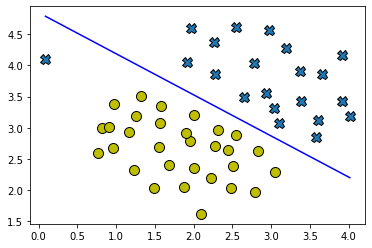

In [3]:
C=1
model= utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

## 1.2 SVMs with Gaussian Kernel
In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.

In [4]:
def gaussianKernel(x1,x2,sigma):
    # x1 and x2 are two separate datapoints, we need to give the similarity between them
    sim= np.exp(-np.sum((x1-x2)**2) / (2*(sigma**2 ) ))
    
    return sim    

In [5]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



In [6]:
grader[1]=gaussianKernel
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |   0 /  25 | 
                           Email Processing |   0 /  25 | 
                   Email Feature Extraction |   0 /  25 | 
                                  --------------------------------
                                            |  25 / 100 |  



## 1.2.1 Example Dataset 2

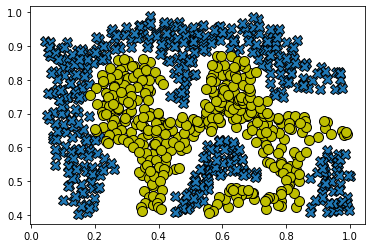

In [7]:
data=loadmat(os.path.join('Data','ex6data2.mat'))
X, y= data['X'], data['y'][:,0]
utils.plotData(X,y)

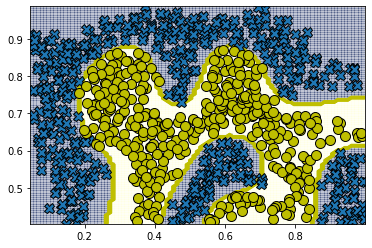

In [8]:
C=1
sigma=0.1
model= utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)

## 1.2.2 Example Dataset 3

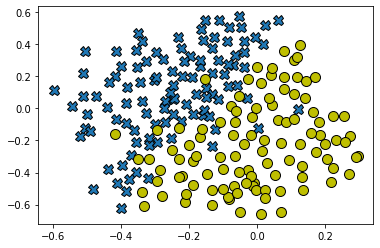

In [9]:
data= loadmat(os.path.join('Data','ex6data3.mat'))
X, y, Xcv, ycv= data['X'], data['y'][:,0], data['Xval'], data['yval']
                
utils.plotData(X,y)

Your task is to use the cross validation set Xcv, ycv to determine the best $C$ and $\sigma$ parameter to use. You should write any additional code necessary to help you search over the parameters $C$ and $\sigma$. For both $C$ and $\sigma$, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). Note that you should try all possible pairs of values for $C$ and $\sigma$ (e.g., $C = 0.3$ and $\sigma = 0.1$). For example, if you try each of the 8 values listed above for $C$ and for $\sigma^2$, you would end up training and evaluating (on the cross validation set) a total of $8^2 = 64$ different models. After you have determined the best $C$ and $\sigma$ parameters to use, you should modify the code in dataset3Params, filling in the best parameters you found. For our best parameters, the SVM returned a decision boundary shown in the figure below.

**Implementation Tip:** <font color= Blue> When implementing cross validation to select the best $C$ and $\sigma$ parameter to use, you need to evaluate the error on the cross validation set. Recall that for classification, the error is defined as the fraction of the cross validation examples that were classified incorrectly. In `numpy`, you can compute this error using `np.mean(predictions != yval)`, where `predictions` is a vector containing all the predictions from the SVM, and `yval` are the true labels from the cross validation set. You can use the `utils.svmPredict` function to generate the predictions for the cross validation set.</font>

In [10]:
def dataset3Params(X, y, Xcv, ycv):
    C_vector=np.array([0.01,0.03,0.1,0.3,1,3,10,30])
    sigma_vector= np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    error_cv=1 #Initially
        
    for i in range(len(C_vector)):
        for j in range(len(sigma_vector)):
            model= utils.svmTrain(X, y, C_vector[i], gaussianKernel, args=(sigma_vector[j],))
            predictions= utils.svmPredict(model, Xcv)
            prediction_error= np.mean(np.array(predictions.ravel())!=np.array(ycv.ravel()))
            
            if error_cv> prediction_error:
                error_cv= prediction_error
                C_best= C_vector[i]
                sigma_best= sigma_vector[j]
    
    return C_best, sigma_best    

1.0 0.1


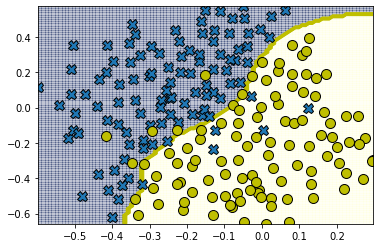

In [11]:
# Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xcv, ycv)

# Train the SVM
# model = utils.svmTrain(X, y, C, lambda x1, x2: gaussianKernel(x1, x2, sigma))
model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)
print(C, sigma)

In [12]:
grader[2]= lambda : (C, sigma)
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
                           Email Processing |   0 /  25 | 
                   Email Feature Extraction |   0 /  25 | 
                                  --------------------------------
                                            |  50 / 100 |  



# 2 Spam Classification
Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.

You will be training a classifier to classify whether a given email, $x$, is spam ($y = 1$) or non-spam ($y = 0$). In particular, you need to convert each email into a feature vector $x \in \mathbb{R}^n$ . The following parts of the exercise will walk you through how such a feature vector can be constructed from an email.

The dataset included for this exercise is based on a a subset of the SpamAssassin Public Corpus. For the purpose of this exercise, you will only be using the body of the email (excluding the email headers).

In [13]:
def processEmail(email_contents, verbose=True):
    vocabList=utils.getVocabList()
    word_indices=[]

    # ========================== Preprocess Email ===========================
    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers
    # hdrstart = email_contents.find(chr(10) + chr(10))
    # email_contents = email_contents[hdrstart:]

    # Lower case
    email_contents = email_contents.lower()
    
    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents =re.compile('<[^<>]+>').sub(' ', email_contents)

    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.compile('[0-9]+').sub(' number ', email_contents)

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.compile('(http|https)://[^\s]*').sub(' httpaddr ', email_contents)

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.compile('[^\s]+@[^\s]+').sub(' emailaddr ', email_contents)
    
    # Handle $ sign
    email_contents = re.compile('[$]+').sub(' dollar ', email_contents)
    
    # get rid of any punctuation
    email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', email_contents)

    # remove any empty word string
    email_contents = [word for word in email_contents if len(word) > 0]
    
    # Stem the email contents word by word
    stemmer = utils.PorterStemmer()
    processed_email = []
    
    for word in email_contents:
        # Remove any remaining non alphanumeric characters in word
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)

        if len(word) < 1:
            continue

        # Look up the word in the dictionary and add to word_indices if found
        try:
            word_indices.append(vocabList.index(word))
            
        except ValueError:
            pass
        
        
    if verbose:
        print('----------------')
        print('Processed email:')
        print('----------------')
        print(' '.join(processed_email))
    return word_indices

In [14]:
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in processEmail.m to produce a word indices vector
#  for a given email.

# Extract Features
with open(os.path.join('Data', 'emailSample1.txt')) as fid:
    file_contents = fid.read()

word_indices  = processEmail(file_contents)

#Print Stats
print('-------------')
print('Word Indices:')
print('-------------')
print(word_indices)

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
-------------
Word Indices:
-------------
[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1894, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 476, 1119, 1892, 1509, 798, 1181, 1236, 511, 1119, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]


In [15]:
grader[3] = processEmail
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
                           Email Processing |  25 /  25 | Nice work!
                   Email Feature Extraction |   0 /  25 | 
                                  --------------------------------
                                            |  75 / 100 |  



In [16]:
def emailFeatures(word_indices):
    vocabList=utils.getVocabList()   
    n=len(vocabList)
    feature_vec=np.zeros((n,1))
    
    for i in word_indices:
        feature_vec[i]=1
    
    return feature_vec 

In [17]:
features = emailFeatures(word_indices)
print("Length of feature vector: ",len(features))
print("Number of non-zero entries: ",np.sum(features))

Length of feature vector:  1899
Number of non-zero entries:  45.0


In [18]:
grader[4]=emailFeatures
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (kunind444@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
                           Email Processing |  25 /  25 | Nice work!
                   Email Feature Extraction |  25 /  25 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  



## Training SVM for Spam Classification 

In [28]:
spam_mat = loadmat(os.path.join('Data','spamTrain.mat'))
Xtrain =spam_mat["X"]
ytrain = spam_mat["y"].ravel()
ytrain.shape

(4000,)

In [30]:
C=1
model = utils.svmTrain(Xtrain, ytrain, C, gaussianKernel, args=(0.1,))

TypeError: ufunc 'true_divide' output (typecode 'd') could not be coerced to provided output parameter (typecode 'L') according to the casting rule ''same_kind''

In [ ]:
predictions= utils.svmPredict(model, Xcv)
prediction_score= np.mean(np.array(predictions.ravel())==np.array(ycv.ravel()))*100
print('Train accuracy is equal to:',prediction_score, '%')

In [ ]:
spam_mat_test = loadmat("spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test =spam_mat_test["ytest"]

In [ ]:
test_prediction= utils.svmPredict(model, X_test)
test_prediction_score= np.mean(np.array(test_prediction.ravel())== np.array(y_test.ravel()))*100
print('Test accuracy is equal to:{.2f}%'%test_prediction_score)